In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as KMeans

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.sample(5)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
31           32  Female   21                  30                      73
84           85  Female   21                  54                      57
187         188    Male   28                 101                      68
63           64  Female   54                  47                      59
1             2    Male   21                  15                      81

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

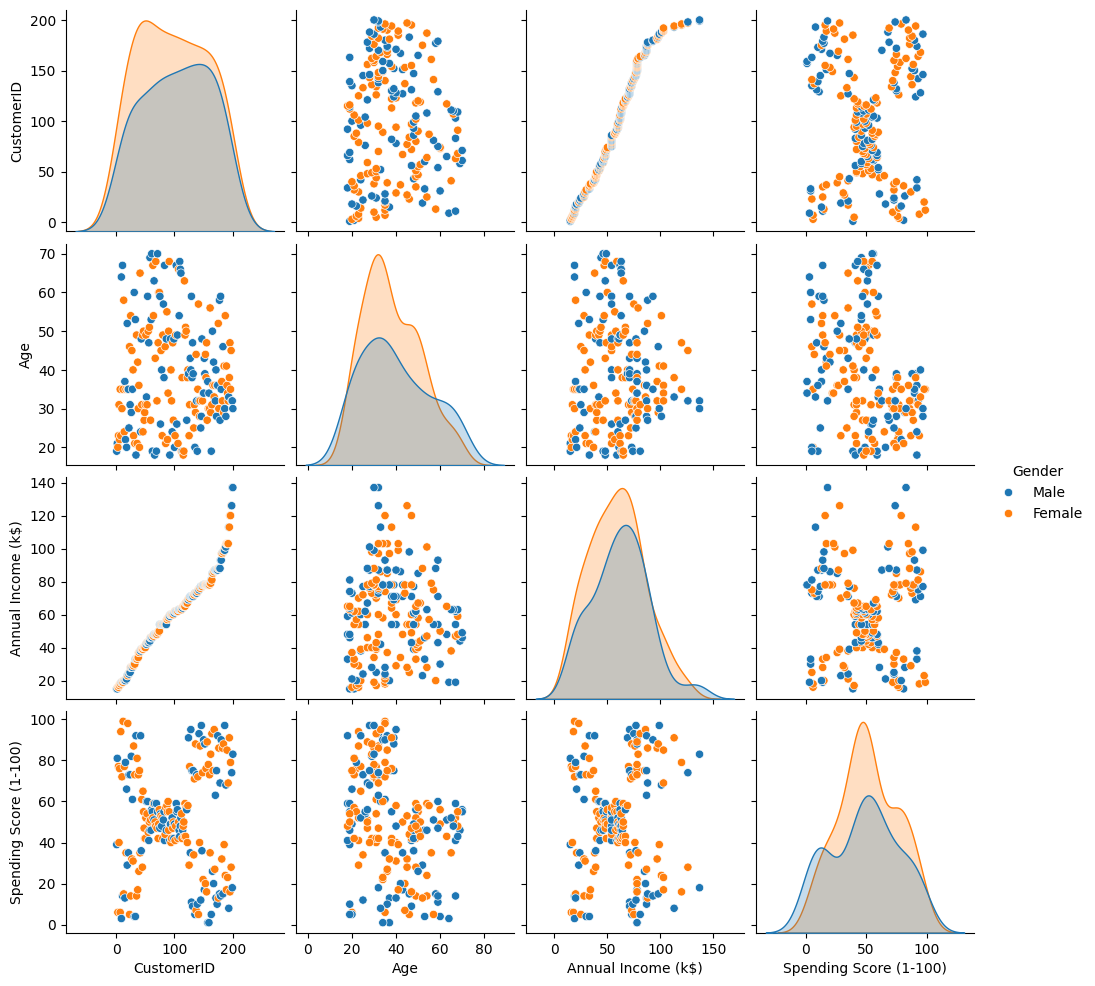

In [9]:
sns.pairplot(df, hue='Gender')
plt.show()

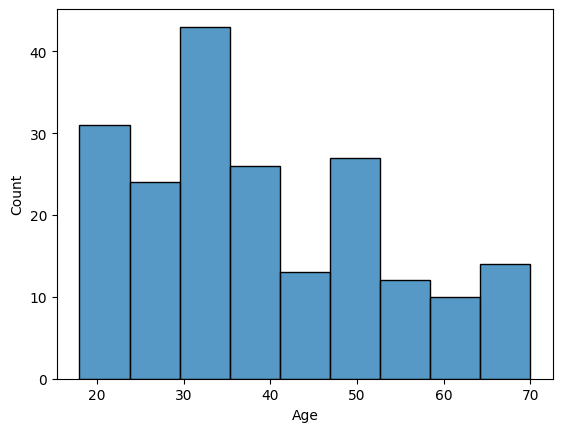

In [15]:
sns.histplot(df['Age'])
plt.show()

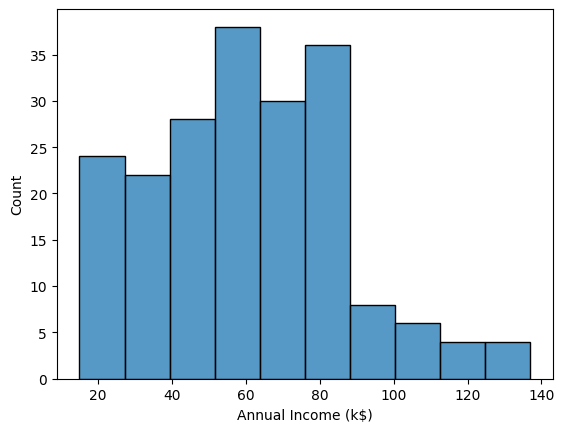

In [17]:
sns.histplot(df['Annual Income (k$)'])
plt.show()

In [18]:
X = df.iloc[:, [3,4]].values

In [19]:
print(X[0])

[15 39]


In [27]:
from sklearn.cluster import KMeans
sum_square = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    k_means.fit(X)
    
    sum_square.append(k_means.inertia_)


print(sum_square)

[269981.28, 183653.32894736843, 106348.37306211119, 73880.64496247195, 44448.45544793371, 40825.16946386946, 33642.57922077922, 26686.837785187785, 24766.471609793443, 23103.122085983916]


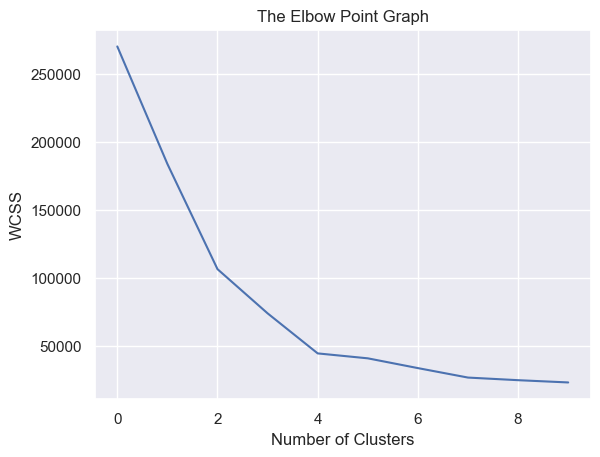

In [28]:
sns.set()
plt.plot(sum_square)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [39]:
df['cluster'] = Y
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  cluster
0           1    Male   19                  15                      39        3
1           2    Male   21                  15                      81        4
2           3  Female   20                  16                       6        3
3           4  Female   23                  16                      77        4
4           5  Female   31                  17                      40        3

In [41]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
print(df1.head())

    CustomerID  Gender  ...  Spending Score (1-100)  cluster
43          44  Female  ...                      61        0
46          47  Female  ...                      55        0
47          48  Female  ...                      47        0
48          49  Female  ...                      42        0
49          50  Female  ...                      42        0

[5 rows x 6 columns]


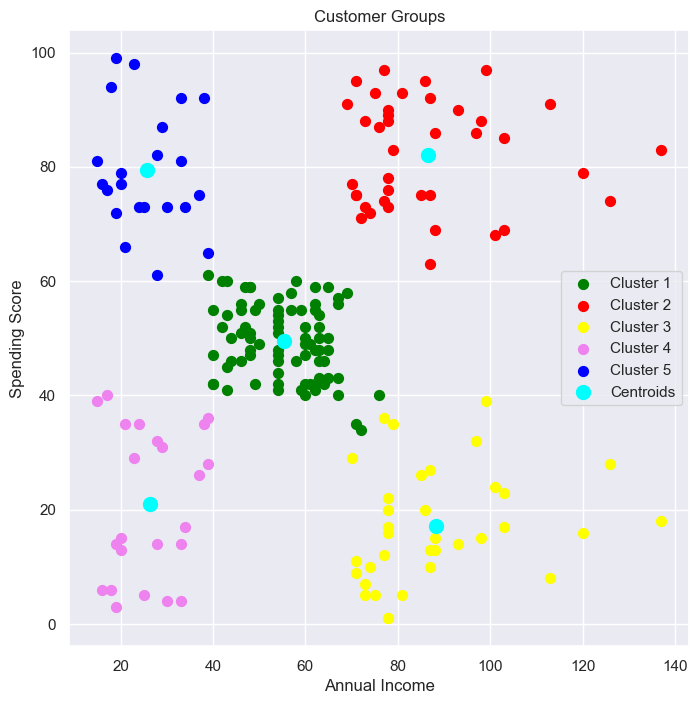

In [42]:
plt.figure(figsize=(8, 8))
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], s=50, c='green', label='Cluster 1')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], s=50, c='red', label='Cluster 2')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], s=50, c='yellow', label='Cluster 3')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], s=50, c='violet', label='Cluster 4')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], s=50, c='blue', label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=100, c='cyan', label='Centroids')

# Final formatting
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()